In [9]:
#This model will analyze labor data using a few different statistical techniques, focusing on discouraged workers
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install xlrd
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install numpy

In [7]:
#This first group will build a regressor analysis with 1 variable
import pandas as pd
import xlrd
#Import our discouraged worker and wage data
Underemployment=pd.read_excel(io=r"C:\Users\kanth\OneDrive\Documents\Python Work Sample\wages.xls",
                         sheet_name="EPI-Underemployment",
                         usecols=[1],
                         skiprows=0);
discouraged=pd.read_excel(io=r"C:\Users\kanth\OneDrive\Documents\Python Work Sample\wages.xls",
                         sheet_name="BLS-Discouraged",
                         usecols=[14],
                         skiprows=13);
#print('wages')
#print(Underemployment)
#print('discouraged workers')
#print(discouraged)
#data works!

In [33]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
#No need for data frame using previous data
Rate=pd.read_excel(io=r"C:\Users\kanth\OneDrive\Documents\Python Work Sample\wages.xls",
                         sheet_name="Combined",
                         usecols=[1],
                         skiprows=0);
#Non-linear variable to be used later
Rate2=Rate**2


#varRate=sm.add_constant(Rate)
#Run OLS
#model1=sm.OLS(discouraged,varRate).fit()
#Print OLS Data
#print(model1.summary())
#We have a statistically significant positive effect of underemployment on discouraged workers
#df=pd.read_excel(r'C:\Users\kanth\OneDrive\Documents\Python Work Sample\wages.xls',sheet_name='Combined',usecols=[1,2,3])
#sns.regplot(x='Rate', y='Discouraged', data=df)
#Note that observing the data, we may have a quadratic relationship
#Next I will build a quadratic relationship and test for non-linearity
import numpy as np
df=pd.read_excel(r'C:\Users\kanth\OneDrive\Documents\Python Work Sample\wages.xls',sheet_name='Combined',usecols=[1,3])
df['Rate2']=Rate2
#print(df)
Y1=df[['Discouraged']]
X1=df[['Rate','Rate2']]
#print(X)
#print(Y)

X1 = sm.add_constant(X1) 
est1 = sm.OLS(Y1, X1).fit()
est1.summary()
#note that we have improved our fit considerably and all of variables are statistically significant, indicating non-linearity.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Discouraged   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     25.83
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           5.38e-07
Time:                        11:00:18   Log-Likelihood:                -188.45
No. Observations:                  30   AIC:                             382.9
Df Residuals:                      27   BIC:                             387.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        783.9621     45.354     17.285      0.000     690.903     877.021
Rate        -246.9697     51.418     -4.803      0.000    -352.470    -141.469
Rate2         32.1195      9.440      3.402      0.002      12.750      51.489
==============================================================================
Omnibus:                       10.584   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.390
Skew:                           0.978   Prob(JB):                      0.00554
Kurtosis:                       5.118   Cond. No.                         38.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                    Robust linear Model Regression Results                    
Dep. Variable:         Annual Average   No. Observations:                   30
Model:                            RLM   Df Residuals:                       28
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 03 Apr 2024                                         
Time:                        10:38:28                                         
No. Iterations:                    10                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -197.6610     65.738     

<Axes: xlabel='Underemployment', ylabel='Discouraged'>

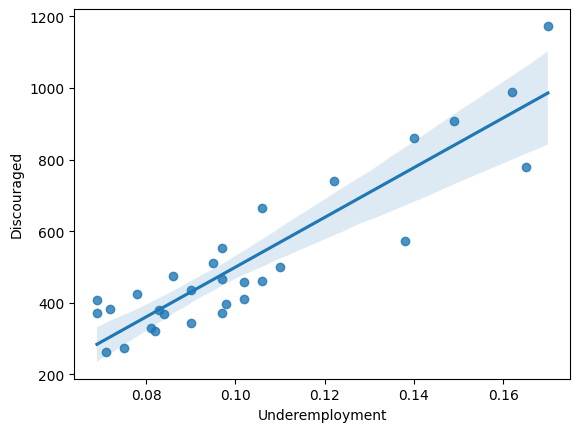

In [14]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
#No need for data frame using previous data
Underemployment=pd.read_excel(io=r"C:\Users\kanth\OneDrive\Documents\Python Work Sample\wages.xls",
                         sheet_name="Combined",
                         usecols=[2],
                         skiprows=0);
varUnderemployment=sm.add_constant(Underemployment)
#Run OLS
model2=sm.RLM(discouraged,varUnderemployment).fit()
#Print OLS Data
print(model2.summary())
#We have a statistically significant positive effect of underemployment on discouraged workers
df=pd.read_excel(r'C:\Users\kanth\OneDrive\Documents\Python Work Sample\wages.xls',sheet_name='Combined',usecols=[1,2,3])
sns.regplot(x='Underemployment', y='Discouraged', data=df)

In [37]:
#Next I will build a multi-variate model to observe if these changes happen together. 
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
#non-linear variable
Rate=pd.read_excel(io=r"C:\Users\kanth\OneDrive\Documents\Python Work Sample\wages.xls",
                         sheet_name="Combined",
                         usecols=[1],
                         skiprows=0);
Rate2=Rate**2
df=pd.read_excel(r'C:\Users\kanth\OneDrive\Documents\Python Work Sample\wages.xls',sheet_name='Combined',usecols=[1,2,3])
df['Rate2']=Rate2
#print(df)
Y=df[['Discouraged']]
X=df[['Rate','Rate2','Underemployment']]
#print(X)
#print(Y)

X = sm.add_constant(X) 
est = sm.RLM(Y, X).fit()
est.summary()
#sns.regplot(x='Unemployment', y='Discouraged', data=df)
#Note that we have not only improved our adj R^2 from both models, but the F statistic indicates statistically significant results.

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:            Discouraged   No. Observations:                   30
Model:                            RLM   Df Residuals:                       26
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 03 Apr 2024                                         
Time:                        11:06:23                                         
No. Iterations:                    11                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              67.8273    102.185      0.664      0.507    -132.451     268.105
Rate              -70.4918     37.560     -1.877      0.061    -144.108       3.124
Rate2               7.2715      6.261      1.161      0.246      -5.000      19.544
Underemployment  5338.4734    730.702      7.306      0.000    3906.324    6770.623
===================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [ ]:
#Building difference in difference to understand worker discouragement